In [64]:
#!pip install -r requirements.txt


In [65]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats
from fredapi import Fred
from datetime import datetime

In [66]:
from Analysis.utils import EDA_comparison, FredIndicatorFetcher,HistoricalDataDownloader

In [92]:
def plot_performance(merged_data_2, sp500_column='Return (SMA 3)', indicators_columns=None):

    if indicators_columns is None:
        indicators_columns = (['CLI', 'CCI', 'GDP', 'BCI'])

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

    for indicator in indicators_columns:
        ax1.plot(merged_data_2.index, merged_data_2[indicator], label=indicator)

    ax1.set_title('Economic Indicators Performance')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Value')
    ax1.legend(loc='best')
    ax1.set_ylim([96, 104])
    ax1.axhline(y=100, color='red', linestyle='--', linewidth=2)

    ax2.plot(merged_data_2.index, merged_data_2[sp500_column], label=sp500_column, color='black')
    ax2.set_title('S&P 500 Performance')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Value')
    ax2.legend(loc='best')
    ax2.set_ylim([96, 104])
    ax2.axhline(y=100, color='red', linestyle='--', linewidth=2)

    plt.tight_layout()
    plt.show()


In [101]:
sp500_data = pd.read_excel('data/sp500_data.xlsx')
economic_indicators_data = pd.read_excel('data/economic_indicators_data.xlsx')

In [102]:
# Configurar estilos de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [118]:
a = EDA_comparison(sp500_data = sp500_data, economic_indicators_data =economic_indicators_data)
merged_data = a.merged_data


***

In [128]:
merged_data_2 = merged_data.copy()
# for a in ['CLI', 'BCI', 'GDP', 'CCI']:
#     merged_data_2[a] = np.where(merged_data_2[a]<97,97,merged_data_2[a])

merged_data_2

,^GSPC CLOSE,Daily Return,CLI,BCI,GDP,CCI
Date,,,,,,
2000-02-01,1409.280029,0.010628,101.16580,100.61020,101.5818,102.8489
2000-03-01,1379.189941,0.009346,101.08020,100.41700,101.6581,102.7685
2000-05-01,1468.250000,0.010892,100.84420,99.99604,101.7747,102.7249
2000-06-01,1448.810059,0.019858,100.69700,99.77863,101.7674,102.6267
2000-08-01,1438.099976,0.005081,100.34110,99.41608,101.6210,102.5589
...,...,...,...,...,...,...
2023-12-01,4594.629883,0.005874,99.71788,98.76071,100.5243,98.1097
2024-01-02,4742.830078,-0.005661,99.99000,99.14000,100.1272,99.1000
2024-01-03,4704.810059,-0.008016,100.11000,99.13000,100.2548,98.8300


*** 
### Otra estrategia

In [129]:
merged_data_2['Daily Return (Normalized)'] = 100 * (merged_data_2['Daily Return'] +1)

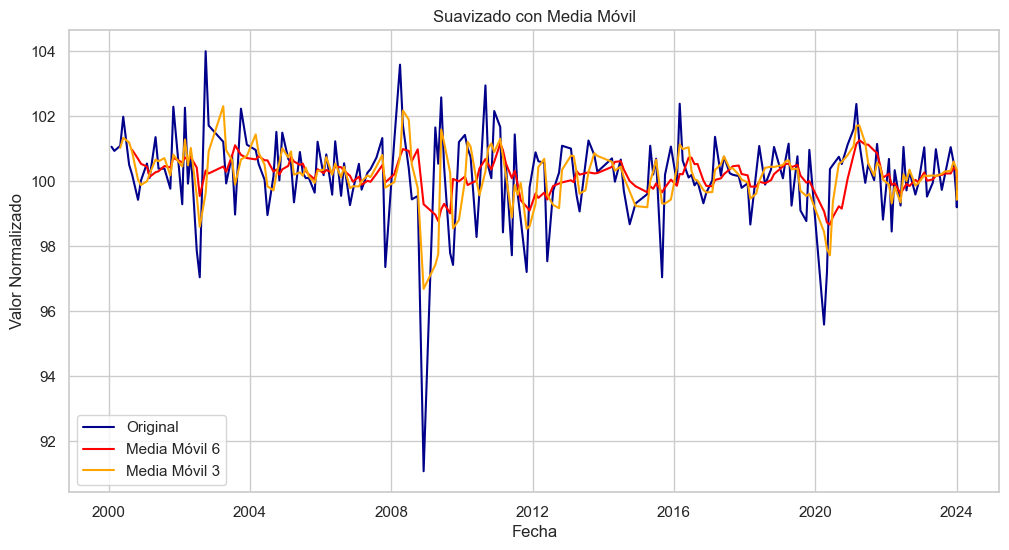

In [130]:
# Suavizado con media móvil simple
window_size = 6  # Tamaño de la ventana
merged_data_2['Daily Return (Smoothed MA 6)'] = merged_data_2['Daily Return (Normalized)'].rolling(window=window_size).mean()

window_size = 3  # Tamaño de la ventana
merged_data_2['Daily Return (Smoothed MA 3)'] = merged_data_2['Daily Return (Normalized)'].rolling(window=window_size).mean()


# Visualización
plt.figure(figsize=(12, 6))
plt.plot(merged_data_2.index, merged_data_2['Daily Return (Normalized)'], label='Original', c='darkblue')
plt.plot(merged_data_2.index, merged_data_2['Daily Return (Smoothed MA 6)'], label='Media Móvil 6', color='red')
plt.plot(merged_data_2.index, merged_data_2['Daily Return (Smoothed MA 3)'], label='Media Móvil 3', color='orange')
plt.figsize=(9, 7)
plt.title('Suavizado con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.show()


***

In [131]:
merged_data_2

,^GSPC CLOSE,Daily Return,CLI,BCI,GDP,CCI,Daily Return (Normalized),Daily Return (Smoothed MA 6),Daily Return (Smoothed MA 3)
Date,,,,,,,,,
2000-02-01,1409.280029,0.010628,101.16580,100.61020,101.5818,102.8489,101.062782,NaN,NaN
2000-03-01,1379.189941,0.009346,101.08020,100.41700,101.6581,102.7685,100.934551,NaN,NaN
2000-05-01,1468.250000,0.010892,100.84420,99.99604,101.7747,102.7249,101.089205,NaN,101.028846
2000-06-01,1448.810059,0.019858,100.69700,99.77863,101.7674,102.6267,101.985787,NaN,101.336514
2000-08-01,1438.099976,0.005081,100.34110,99.41608,101.6210,102.5589,100.508098,NaN,101.194363
...,...,...,...,...,...,...,...,...,...
2023-12-01,4594.629883,0.005874,99.71788,98.76071,100.5243,98.1097,100.587374,100.416369,100.605962
2024-01-02,4742.830078,-0.005661,99.99000,99.14000,100.1272,99.1000,99.433942,100.328461,100.357305
2024-01-03,4704.810059,-0.008016,100.11000,99.13000,100.2548,98.8300,99.198369,100.030615,99.739895


## MM 6

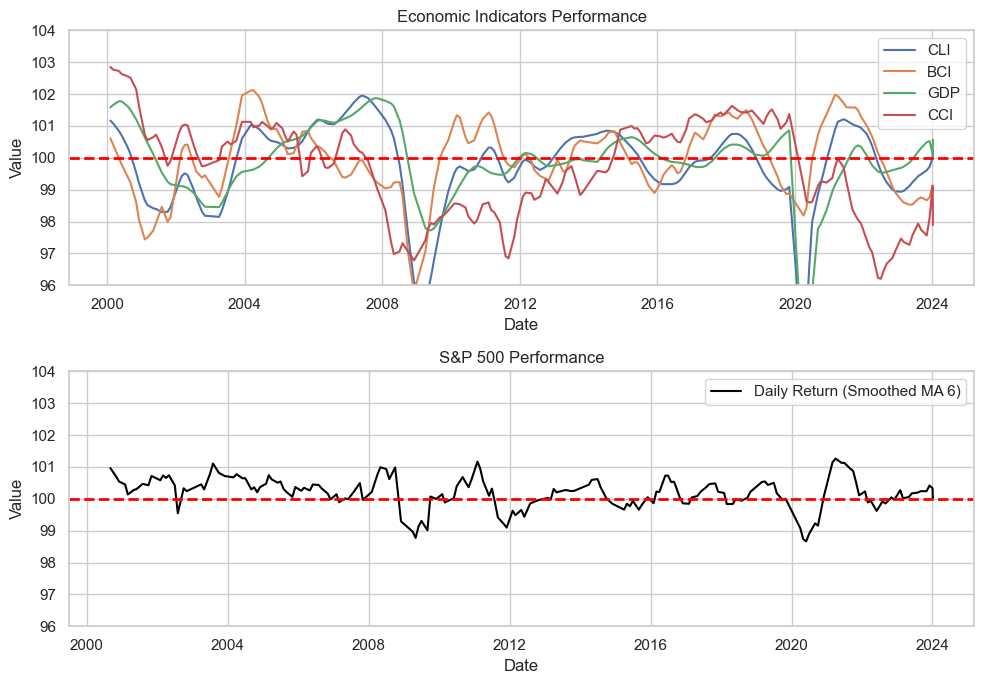

In [132]:
# a.plot_performance(sp500_column='Daily Return (Smoothed MA)',indicators_columns= ['CLI','BCI','GDP','CCI'])

plot_performance(merged_data_2, sp500_column='Daily Return (Smoothed MA 6)', indicators_columns=['CLI','BCI','GDP','CCI'])


## MM 3

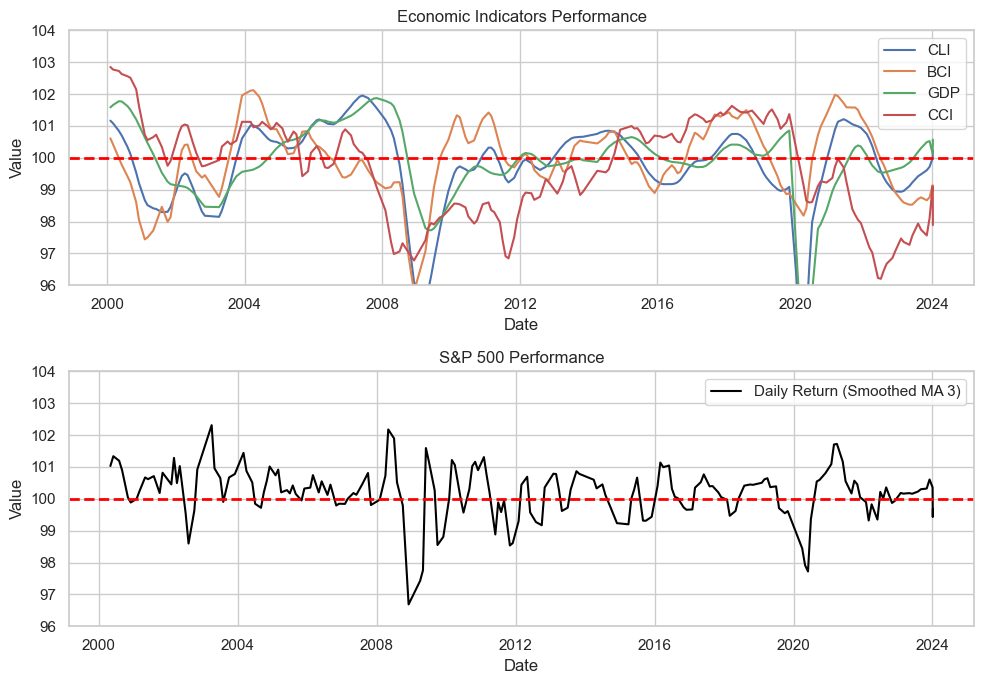

In [133]:
plot_performance(merged_data_2, sp500_column='Daily Return (Smoothed MA 3)', indicators_columns=['CLI','BCI','GDP','CCI'])


## Base 100

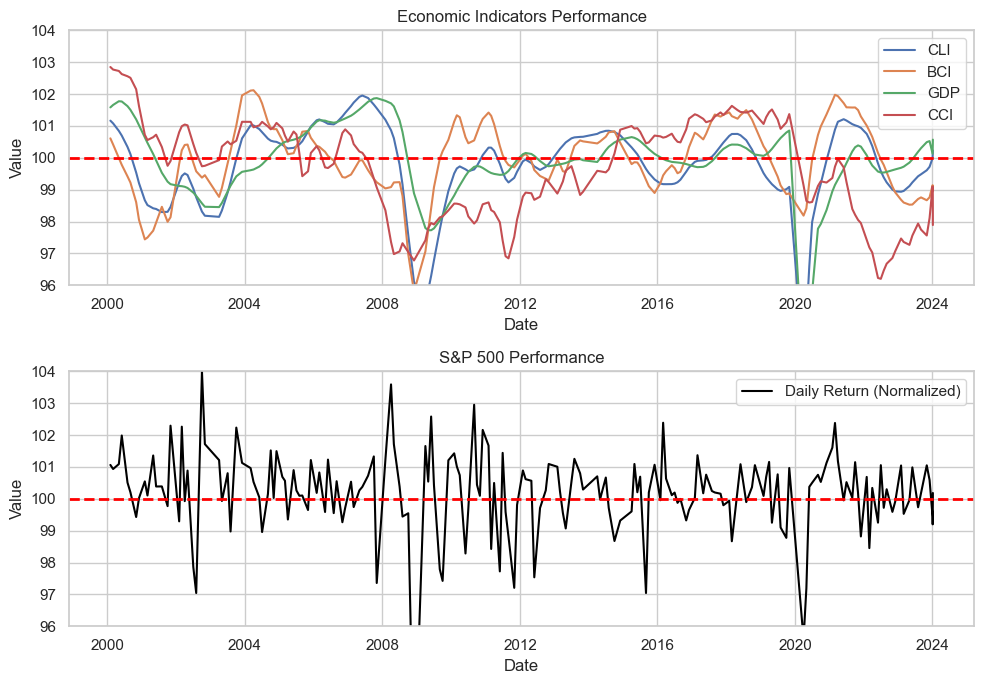

In [134]:
plot_performance(merged_data_2, sp500_column='Daily Return (Normalized)', indicators_columns=['CLI','BCI','GDP','CCI'])


## Correlaciones

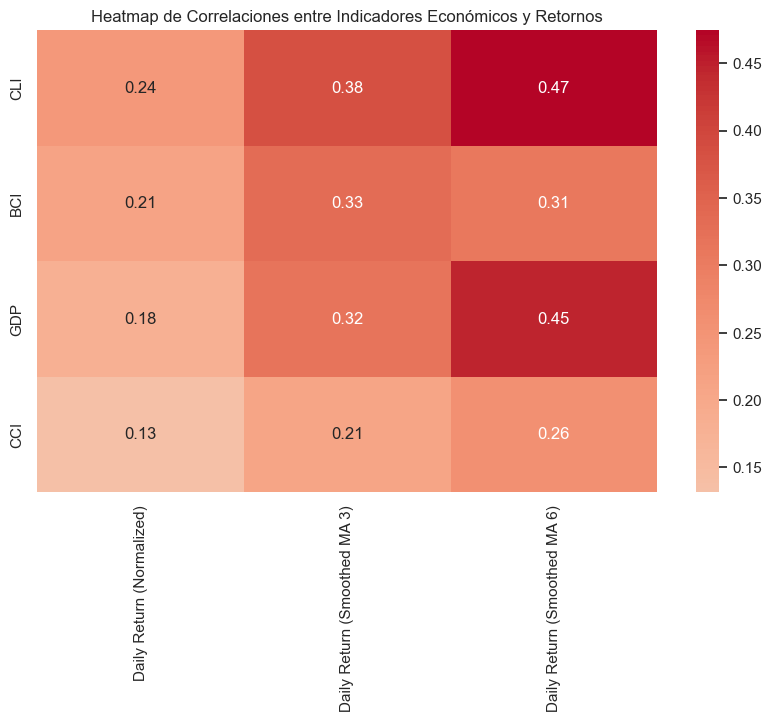

In [135]:
# Seleccionar las columnas económicas y de retornos
economic_indicators = merged_data_2[['CLI', 'BCI', 'GDP', 'CCI']]
returns_columns = merged_data_2[['Daily Return (Normalized)', 'Daily Return (Smoothed MA 3)', 'Daily Return (Smoothed MA 6)']]

# Calcular la correlación cruzada entre las columnas económicas y los retornos
correlation_matrix = pd.concat([economic_indicators, returns_columns], axis=1).corr()

# Extraer solo las correlaciones entre las columnas de interés
correlations = correlation_matrix.loc[economic_indicators.columns, returns_columns.columns]

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)

# Títulos y etiquetas
plt.title('Heatmap de Correlaciones entre Indicadores Económicos y Retornos')
plt.show()


In [136]:
merged_data_2

,^GSPC CLOSE,Daily Return,CLI,BCI,GDP,CCI,Daily Return (Normalized),Daily Return (Smoothed MA 6),Daily Return (Smoothed MA 3)
Date,,,,,,,,,
2000-02-01,1409.280029,0.010628,101.16580,100.61020,101.5818,102.8489,101.062782,NaN,NaN
2000-03-01,1379.189941,0.009346,101.08020,100.41700,101.6581,102.7685,100.934551,NaN,NaN
2000-05-01,1468.250000,0.010892,100.84420,99.99604,101.7747,102.7249,101.089205,NaN,101.028846
2000-06-01,1448.810059,0.019858,100.69700,99.77863,101.7674,102.6267,101.985787,NaN,101.336514
2000-08-01,1438.099976,0.005081,100.34110,99.41608,101.6210,102.5589,100.508098,NaN,101.194363
...,...,...,...,...,...,...,...,...,...
2023-12-01,4594.629883,0.005874,99.71788,98.76071,100.5243,98.1097,100.587374,100.416369,100.605962
2024-01-02,4742.830078,-0.005661,99.99000,99.14000,100.1272,99.1000,99.433942,100.328461,100.357305
2024-01-03,4704.810059,-0.008016,100.11000,99.13000,100.2548,98.8300,99.198369,100.030615,99.739895
